In [1]:
import sys
import pickle 

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
from Functions import renormalize, scomplex, plotting, support
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw as pwl
import seaborn as sns
import scipy
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams["text.usetex"] = True

import matplotlib.colors as mcolors

from matplotlib.colors import LinearSegmentedColormap

#colors = ["#071C56","#06418F","#2B589F","#5A5389","#7F588D","#533262","#B45389","#D75F78","#FDA599","#A40237"]
colors = ["#003F5C","#2F4B7C","#665191","#A05195","#D45087","#F95D6A","#FF7C43","#FFA600"]
colors_sequential = colors + colors + colors + colors 
colors = ["#02405c", "#fea600", "#a20655", "#5e96c5", "#4b3596", "#fa6ca9", "#8d6cf6"]
colors_curves = colors+ colors+ colors+ colors
#cmap = LinearSegmentedColormap.from_list("my_sas",colors)


## Generate Simplicial Complex

### Tree increase branching

In [69]:
edges = [(0,1)]
new_boundary = [0,1]
n = 2
steps = 6
sas = 3
for s in range(steps):
    boundary = new_boundary
    new_boundary = []
    #if np.mod(s,4) == 0:
    #    sas += 1
    for node in boundary:
        for l in range(sas):
            new_boundary.append(n)
            edges.append((node,n))
            n += 1
       
G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 2)

sc["n0"]


2186

### Tree 2 0

In [12]:
# Tree (2,0)
edges = [(0,1),(1,2),(0,2)]
new_boundary = [0,1,2]
n = 3
steps = 7
for s in range(steps):
    boundary = new_boundary
    new_boundary = []
    for node in boundary:
        new_boundary.append(n)
        new_boundary.append(n+1)
        edges.append((node,n))
        edges.append((node,n+1))
        edges.append((n,n+1))
        n += 2
G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 2)
sc["n0"]

765

### Tree 2 1

In [40]:
# Tree (2,1)
edges = [(0,1),(1,2),(0,2)]
new_boundary = edges.copy()
n = 3
steps =6
for s in range(steps):
    boundary = new_boundary
    new_boundary = []
    for ed in boundary:
        edges.append((ed[0],n))
        edges.append((ed[1],n))
        new_boundary.append((ed[0],n))
        new_boundary.append((ed[1],n))
        n += 1

G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G, dim = 2)
sc["n0"]

192

### Pseudofractal 2 1

In [453]:
# Pseudofractal (2,1)
def PF21(steps):
    edges = [(0,1),(1,2),(0,2)]
    n = 3
    for s in range(steps):
        boundary = edges.copy()
        for ed in boundary:
            edges.append((ed[0],n))
            edges.append((ed[1],n))
            n += 1

    G = nx.from_edgelist(edges)
    sc = scomplex.convert_graph_to_sc(G,dim = 2)
    return sc

### Pseudofractal 1 0

In [41]:
# Pseudofractal (1,0)
edges = [(0,1)]
nodes = [0,1]
n = 2
steps = 10
for s in range(steps):
    boundary = nodes.copy()
    for node in boundary:
        edges.append((node,n))
        nodes.append(n)
        n += 1

G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 2)
sc["n0"]

2048

### Pseudofractal 3 2

In [4]:
edges = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
faces = [(0,1,2),(0,1,3),(0,2,3),(1,2,3)]
n = 4
steps = 4
for s in range(steps):
    boundary = faces.copy()
    for fa in boundary:
        edges.append((fa[0],n))
        edges.append((fa[1],n))
        edges.append((fa[2],n))
        faces.append((fa[0],fa[1],n))
        faces.append((fa[0],fa[2],n))
        faces.append((fa[1],fa[2],n))
        n += 1

G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 3)
sc["n0"]


344

### Pseudofractal 2 0

In [198]:
# Pseudofractal (2,0)
nodes = [0,1,2]
edges = [(0,1),(1,2),(0,2)]
n = 3
steps = 6
for s in range(steps):
    boundary = nodes.copy()
    for node in boundary:
        edges.append((node,n))
        edges.append((node,n+1))
        edges.append((n,n+1))
        nodes.append(n)
        nodes.append(n+1)
        n += 2

G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 2)

### Real network

In [417]:
#["asoiaf", "ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email", "celegans", "ecoli", "mmusculus", "drosophila"]
f = open("../Datasets/out.asoiaf","r")

i = 0
edges = []
for line in f:
    if i != 0:
        words = line.split()
        edges.append((words[0],words[1]))
    else:
        i += 1
f.close()
G = nx.from_edgelist(edges)
G = nx.convert_node_labels_to_integers(G)
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
sc = scomplex.convert_graph_to_sc(G,dim = 2)


### NGF

In [397]:
# Network Geometry with Flavor
d = 2
N = 2000
s = 1
m = 1
beta = 3
sc = scomplex.NGF(d,N,s,beta,m)

### Lattice

In [70]:
def subdivide(G):
    n = len(G.nodes) 
    G2 = G.copy()
    for e in G2.edges:
        e0 = e[0]
        e1 = e[1]
        G.remove_edge(e0,e1)
        G.add_edge(e0,n)
        G.add_edge(n,e1)
        n += 1
        
    return G

In [74]:
G = nx.grid_graph([20,20],periodic=True)
for s in range(4):
    G = subdivide(G)


sc = scomplex.convert_graph_to_sc(G)
sc["n0"]

12400

### Lattice sparsified

In [90]:
l = 200 #220
s = 20
G = nx.grid_graph([l,l],periodic=True)
G2 = G.copy()
for n in G2.nodes:
    if (np.mod(n[0],s)) != 0 and (np.mod(n[1],s)) != 0 :
        G.remove_node(n)
sc = scomplex.convert_graph_to_sc(G)
#nx.draw(G)
sc["n0"]

3900

In [93]:
L = scomplex.diffusion_laplacian(sc,2,1)
D,U = np.linalg.eigh(L)

<AxesSubplot: >

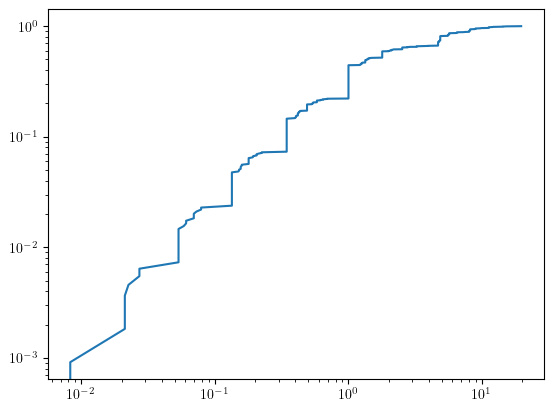

In [94]:
pwl.plot_cdf(D[D>10**-10])
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_grid_eigenvalues_cdf.pdf')


### Mega ladder

In [152]:
lw = 60#220
lh = 16
s = 4
G = nx.grid_graph([lh,lw],periodic=True)
G2 = G.copy()
for n in G2.nodes:
    if (np.mod(n[0],s)) != 0 and (np.mod(n[1],s)) != 0 :
        G.remove_node(n)
H = nx.grid_graph([3,3])
G = nx.cartesian_product(G,H)
sc = scomplex.convert_graph_to_sc(G)
#nx.draw(G)
sc["n0"]

3780

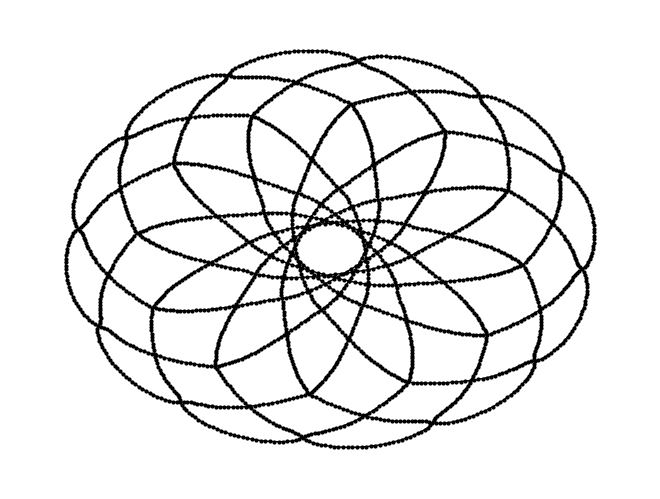

In [33]:
layout = nx.kamada_kawai_layout(G)
nx.draw(G,node_size = 4,pos = layout,node_color = 'black')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_grid_plot.pdf')


### Chain

In [117]:
edges = []
steps = 100
for s in range(steps):
   edges.append((s,s+1))
   #edges.append((s,steps+s))
   #edges.append((steps + s,steps+s + 1))
edges.append((s+1,0))
n = s+1
edges.append((0,n))
for s in range(steps):
   edges.append((n,n+1))
   n+=1
edges.append((n,s+1))

#edges.append((steps + s +1,steps))

G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 1)

### Chordal cycle

In [176]:
G = nx.chordal_cycle_graph(6113)
G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))
sc = scomplex.convert_graph_to_sc(G, dim = 1)

### Random tree

In [94]:
N = 300
G = nx.random_tree(n = N)
sc = scomplex.convert_graph_to_sc(G,dim = 1)

### Mega-tree

In [86]:
def subdivide(G):
    n = np.max(G.nodes) + 1
    G2 = G.copy()
    for e in G2.edges:
        e0 = e[0]
        e1 = e[1]
        G.remove_edge(e0,e1)
        G.add_edge(e0,n)
        G.add_edge(n,e1)
        n += 1
        
    return G

In [100]:
N = 300
G = nx.random_tree(n = N)
G = subdivide(G)
G = subdivide(G)
sc = scomplex.convert_graph_to_sc(G,dim = 1)
sc["n0"]
#layout = nx.kamada_kawai_layout(G)
#nx.draw(G,node_size = 4,pos = layout,node_color = 'black')

1197

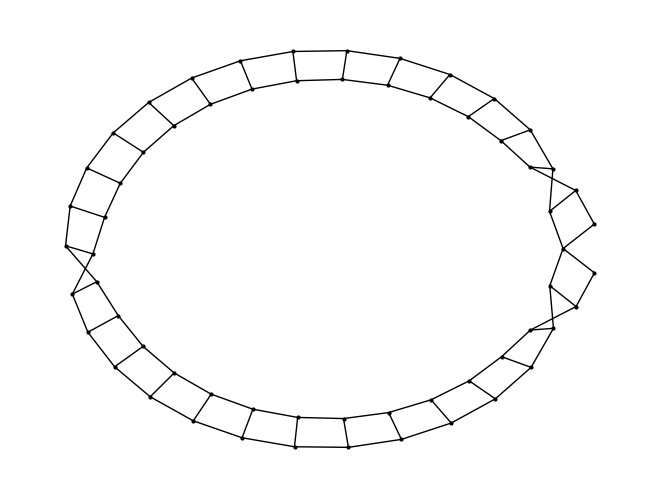

In [41]:
layout = nx.kamada_kawai_layout(G)
nx.draw(G,node_size = 4,pos = layout,node_color = 'black')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_grid_plot.pdf')


### SBM

In [2]:
sizes = [75, 75, 75]
probs = [[0.4, 0.01, 0.01], [0.01, 0.4, 0.01], [0.01, 0.01, 0.40]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
sc = scomplex.convert_graph_to_sc(G,dim = 1)

## Plot complex

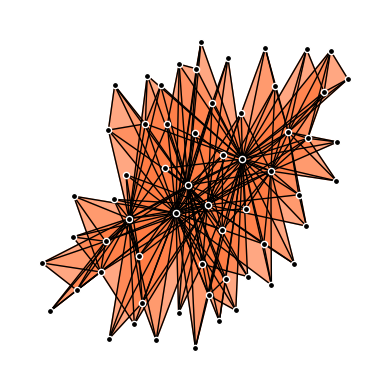

In [185]:
# Plot simplicial complex (might be slow)
f,axs = plt.subplots(1,1,figsize = (4,4))
for i in range(1):
    sc = scomplex.NGF(4,60,1,1,1)
    #ax = axs[i]
    ax = axs
    plotting.plot_complex(sc,ax = ax,face_color=[colors_sequential[2*3]],layout = "spring", iterations = 200, node_size=20,face_alpha = 0.3)
    ax.collections[0].set_linewidth(1) 
    ax.collections[0].set_edgecolor("#FFFFFF") 
    ax.collections[0].set_alpha(1)
plt.tight_layout()
#plt.savefig('../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/plot_complexes_4d.pdf')


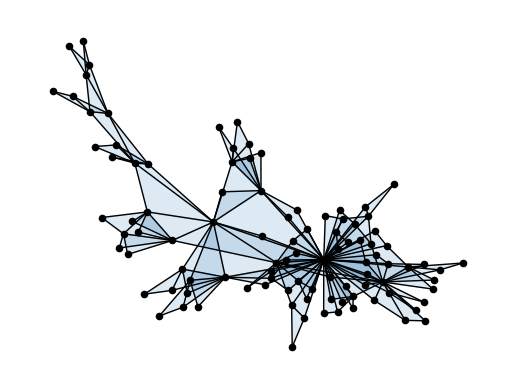

In [188]:
# Plot simplicial complex (might be slow)

f,ax = plt.subplots(1,1)
plotting.plot_complex(sc,ax = ax,face_color=[colors[3]],layout = "spring", iterations = 100, node_size=20)


In [12]:
def compute_spectral_d(D,taumin,taumax,ntau):
    tau_space = np.logspace(taumin, taumax, num=ntau)
    Z = np.zeros(ntau)
    for t in range(ntau):
        Z[t] = np.sum(np.exp(- tau_space[t]*D))

    dS = -2*np.diff(np.log(Z))/np.diff(np.log(tau_space))
    return dS, tau_space[1:]

## Statistical physics of information diffusion

In [177]:
laplacians_types = ["01"]

sparse = False
num_eigs = 500

# Define strings which specify the Laplacians to consider
#laplacians_types = ["01","02","10","12","20","21"]
#laplacians_types = ["01","10"]
#laplacians_types = ["01","02","12"]
#laplacians_types = ["01","03","13","23"]
#laplacians_types = ["01","04","14","24","34"]




Laplacians = []
for l in laplacians_types:    
    L = scomplex.diffusion_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)

    # # Configuration model
    # A = scomplex.diffusion_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)
    # Gcm = nx.Graph(A)
    # Gcm = nx.configuration_model([val for (node, val) in G.degree()])
    # L = nx.laplacian_matrix(Gcm).todense()
    Laplacians.append(L)

# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

eigs = []
sp_heats = []
sp_dims = []

for i in range(len(Laplacians)):
    print(i)
    L = Laplacians[i]
    if sparse:
        D,U = scipy.sparse.linalg.eigsh(L.asfptype(),k = num_eigs, which = "SM")
        D = np.append(D,1000000*np.ones(L.shape[0]-num_eigs),axis=0)
    else:
        D,U = np.linalg.eigh(L)
        D = np.abs(D)
    specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
    spectral_dimension,tau_space = compute_spectral_d(D,taumin,taumax,ntau)
    sp_heats.append(specific_heat)
    sp_dims.append(spectral_dimension)
    eigs.append(D)

0


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### Save Data

In [293]:
name = "dimacs10-celegans_metabolic"
with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'wb') as handle:
    pickle.dump(sp_heats, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Real Data 

In [80]:
# Load real data

# pickle: asoiaf, ego-facebook,subelj_euroroad_euroroad, dimacs10-netscience, arenas-email, celegans, ecoli, mmusculus, drosophila

name = "mmusculus"
typ = "pickle"

if typ == "csv":
    sp_heats = np.loadtxt(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.csv',
                    delimiter=",", dtype=float,skiprows = 1)

    laplacians_types = np.loadtxt(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.csv',
                    delimiter=",", dtype=str)[0,1:]


    tau_space = sp_heats[:,0]
    taumin = -4
    taumax = 3
    sp_heats = [sp_heats[:,i] for i in range(1,len(laplacians_types)+1)] 
elif typ == "pickle":
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'rb') as handle:
        sp_heats = pickle.load(handle)

    d = int((-1+np.sqrt(1+4*len(sp_heats)))/2)
    laplacians_types = [f"{k}{m}" for k in range(d+1) for m in range(d+1) if m!=k]
    tau_space = np.logspace(-5,5,200)[:200-1]



### Load Data NGF

In [56]:
# Load NGF data (deserialize)

d = 3
s = 1
nrep = 10
N = 5000
#with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/Data/d{d}s{s}_{nrep}rep_{N}nodes.pickle', 'rb') as handle:
with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/Data/d{d}s{s}_{nrep}rep_{N}nodes.pickle', 'rb') as handle:

    sp_heats = pickle.load(handle)

if d == 1:
        laplacians_types = ["01"]
else:
    laplacians_types = ["01"]+[f"{l}{d}" for l in range(d)]

taumin = -3
taumax = 5
ntau = 200
tau_space = np.logspace(taumin,taumax,ntau)[:ntau-1]
if d == 1:
    laplacians_types = ["01"]
else:
    laplacians_types = ["01"]+[f"{k}{d}" for k in range(0,d)]


# if d == 1:
#     sp_heats[0] = np.mean(sp_heats[0],0)
# else:
#     for i in range(d+1):
#         sp_heats[i] = np.mean(sp_heats[i],0)
    


## Plot Curves

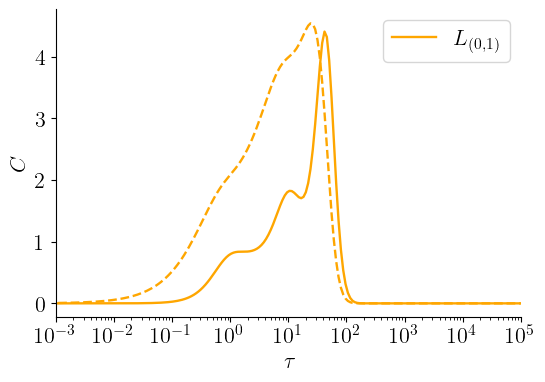

In [178]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(len(laplacians_types)):
    ax.semilogx(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7,alpha = 1)
    ax.semilogx(tau_space,sp_dims[i],linestyle = '--', color = colors_curves[i+1],linewidth = 1.7,alpha = 1)

#ax.set_ylim([10**-1,10])
ax.set_xlim([10**-3,10**5])
#ax.set_ylim([0, 3])
#ax.legend(names,fontsize = 14)

#ax.legend(["Entropic susceptibility", "Spectral dimension"],fontsize = 10)
ax.legend(names,fontsize = 16)


ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#ax.hlines(y =0.58,xmin=1,xmax = 48,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
#ax.hlines(y =1,xmin=100,xmax = 1000,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
#ax.hlines(y =2,xmin=8,xmax = 40,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
#ax.hlines(y =3,xmin=0.5,xmax = 2,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)

sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_ladder_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/asoiaf_curves_configuration.pdf')


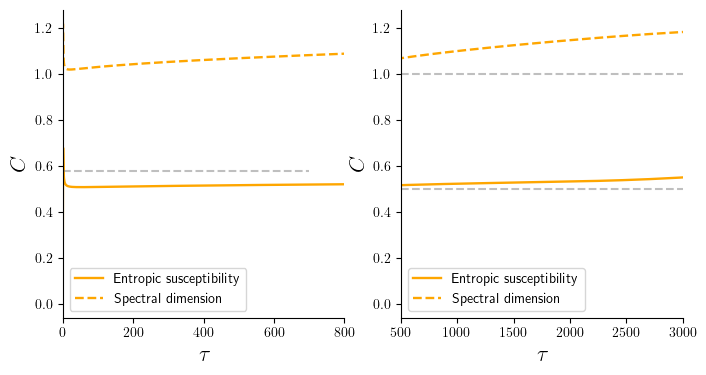

In [35]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,2,figsize = (8,4))
for i in [0]:#range(len(laplacians_types)):
    ax[0].plot(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7,alpha = 1)
    ax[0].plot(tau_space,sp_dims[i],linestyle = '--', color = colors_curves[i+1],linewidth = 1.7,alpha = 1)
for i in [0]:#range(len(laplacians_types)):
    ax[1].plot(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7,alpha = 1)
    ax[1].plot(tau_space,sp_dims[i],linestyle = '--', color = colors_curves[i+1],linewidth = 1.7,alpha = 1)

#ax.set_ylim([10**-2,10])
ax[0].set_xlim([0,800])
ax[1].set_xlim([500,3000])

#ax.set_xlim([0, 0.8])
for i in range(2):
    ax[i].legend(["Entropic susceptibility", "Spectral dimension"],fontsize = 10)
    ax[i].set_xlabel(r"$\tau$",fontsize = 16)
    ax[i].set_ylabel(r"$C$",fontsize = 16)
    #ax[i].set_xticks(fontsize = 16)
    #ax[i].set_yticks(fontsize = 16)

ax[0].hlines(y =0.58,xmin=0.2,xmax = 700,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
ax[1].hlines(y =1,xmin=500,xmax = 3000,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
ax[1].hlines(y =0.5,xmin=500,xmax = 3000,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)

sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_grid.pdf')



### Plot all curves 

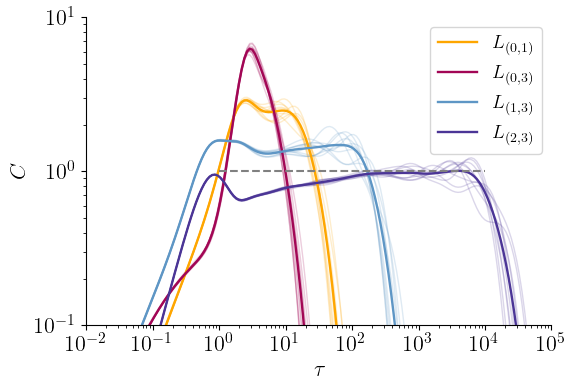

In [57]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))

for i in range(len(laplacians_types)):
    for n in range(nrep):
        ax.loglog(tau_space,sp_heats[i][n],color = colors_curves[i+1],linewidth = 1,alpha = 0.2,label = '_nolegend_')
        #ax.semilogx(tau_space,sp_dims[i],linestyle = '--', color = colors_curves[i+1],linewidth = 1.7,alpha = alph)

for i in range(len(laplacians_types)):
    ax.loglog(tau_space,np.mean(np.array(sp_heats[i]),0),color = colors_curves[i+1],linewidth = 1.7,alpha = 1)

ax.set_ylim([10**-1,10])

ax.set_xlim([10**-2,10**5])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax.hlines(y =1,xmin=1,xmax = 1*10**4,linestyles='--',color = [0.5,0.5,0.5])
#ax.vlines(x =4,ymin=0.1,ymax =2,linestyles='--',color = [0.5,0.5,0.5])

sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/{name}_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/d{d}s{s}_{N}nodes_{nrep}rep.pdf')


## Mean scale

In [61]:
sparse = False
num_eigs = 500

# Define strings which specify the Laplacians to consider
laplacians_types = ["01","02","10","12","20","21"]
#laplacians_types = ["12"]
#laplacians_types = ["01","10"]
#laplacians_types = ["01","02","12"]
#laplacians_types = ["01","03","13","23"]
#laplacians_types = ["01","04","14","24","34"]




Laplacians = []
for l in laplacians_types:
    L = scomplex.diffusion_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)
    Laplacians.append(L)

# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

eigs = []
average_scales = []
log_returns = []

tau_space = np.logspace(taumin, taumax, num=ntau)

for i in range(len(Laplacians)):
    print(i)
    L = Laplacians[i]
    D,U = np.linalg.eig(L)
    D = np.sort((np.real(D)))
    N = len(D)
    average_scale = np.zeros(ntau)
    log_return = np.zeros(ntau)

    for t in range(ntau):
        tau = tau_space[t]
        Z = np.sum(np.exp(-tau*D))
        for j in range(N):
            average_scale[t] = average_scale[t] + D[j]*np.exp(-tau*D[j])
        average_scale[t] = average_scale[t]/Z
        log_return[t] = np.log(Z)

    average_scales.append(average_scale/np.log(N))
    log_returns.append(log_return/np.log(N))



0
1
2
3
4
5


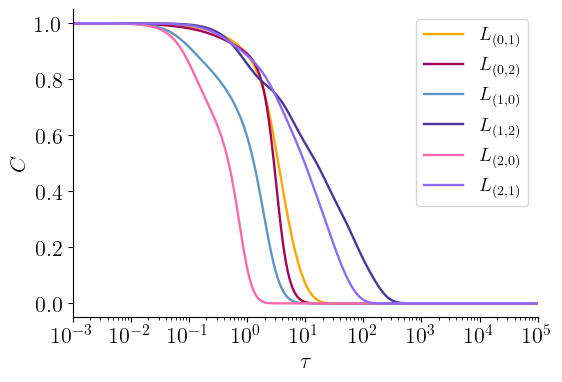

In [62]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(len(laplacians_types)):
    ax.semilogx(tau_space,tau_space*average_scales[i] + log_returns[i],color = colors_curves[i+1],linewidth = 1.7)
    #ax.semilogx(tau_space,log_returns[i],color = colors_curves[i+1],linewidth = 1.7,linestyle = '--')

#ax.set_ylim([10**-2,10])
ax.set_xlim([10**-3,10**5])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#ax.hlines(y =1,xmin=0.2,xmax = 700,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/{name}_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/Pseudofractal/pseudofractal_21.pdf')


## Plot graph

In [380]:
layout = nx.kamada_kawai_layout(G)


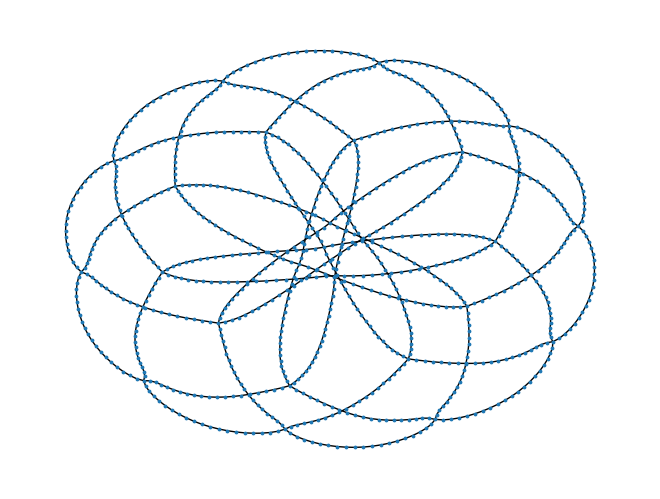

In [381]:
nx.draw(G,pos = layout,node_size = 3, width = 1)


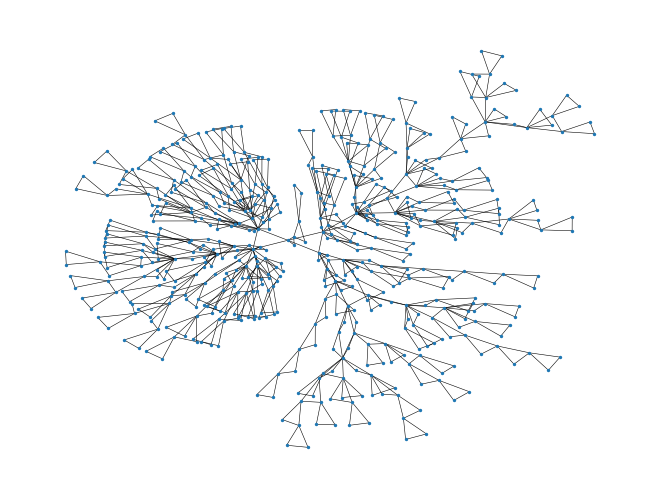

In [27]:
k = 1
l = 2
A = scomplex.adjacency_of_order(sequence[-1],k,l,False)
G = nx.from_numpy_matrix(A)
weights = [0.4*G[u][v]['weight'] for u,v in G.edges]

layout = nx.kamada_kawai_layout(G)
nx.draw(G,pos = layout,node_size = 2,width = weights)
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Graphs/sas.pdf')

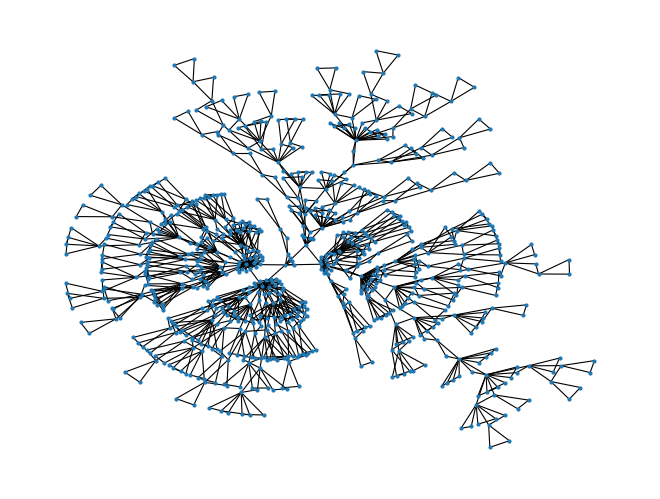

In [21]:
k = 1
l = 2
A = scomplex.adjacency_of_order(sequence[0],k,l,False)
G = nx.from_numpy_matrix(A)
weights = [0.8*G[u][v]['weight'] for u,v in G.edges]

layout = nx.kamada_kawai_layout(G)
nx.draw(G,pos = layout,node_size = 4,width = weights)
#nx.draw(G,node_size = 4,width = weights)
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Graphs/Tree_21_G{k}{l}.pdf')

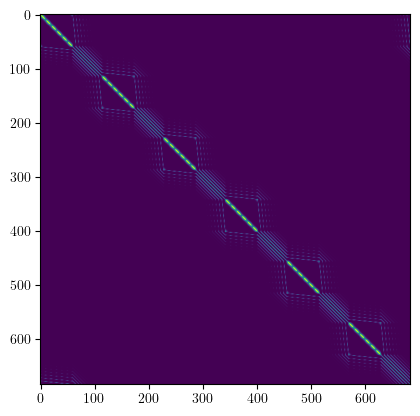

In [364]:
k = 0
l = 1
scc = sc
tau = 3
L = scomplex.diffusion_laplacian(scc,k,l,False)
rho = scipy.linalg.expm(-tau*L)

Gv = nx.Graph()
Gv.add_nodes_from([i for i in range(scc[f"n{k}"])])
for i in range(scc[f"n{k}"]):
    for j in range(i+1,scc[f"n{k}"]):
        if rho[i,j] >= min(rho[i,i],rho[j,j]):
            Gv.add_edge(i,j)
idx_components = {u:i for i,node_set in enumerate(nx.connected_components(Gv)) for u in node_set}
clusters = [idx_components[u] for u in Gv.nodes]
clist = list(mcolors.CSS4_COLORS)*10
colors = clusters.copy()
for i in range(len(clusters)):
    colors[i] = clist[clusters[i]]
plt.imshow(rho)

### Plot graph clusters

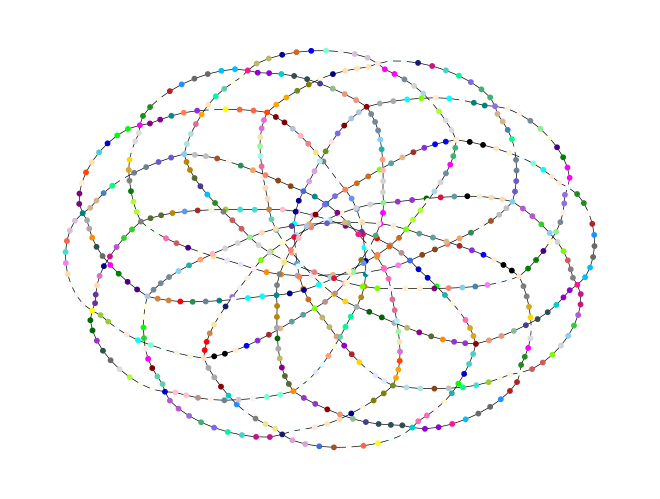

In [368]:
nx.draw(G,pos = layout,node_size = 10,width = 0.5, node_color = colors )

### Andre PhD

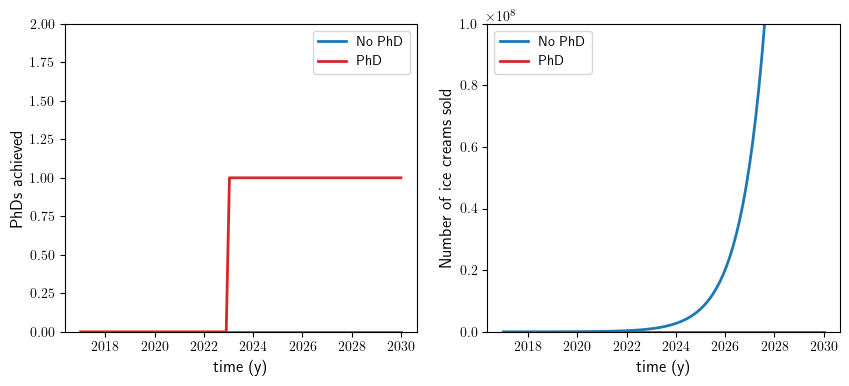

In [280]:
f,axs = plt.subplots(1,2,figsize = (10,4))
t = np.linspace(2017, 2030, 100)

phd0 = t*0
phd1 = t >= 2023
icecreams0 = 10**6*np.exp(t-2023)
icecreams1 = t*0


axs[0].set_xlabel('time (y)')
axs[0].set_ylabel('PhDs achieved')
axs[0].plot(t, phd0, color="tab:blue",linewidth = 2)
axs[0].plot(t, phd1, color="tab:red",linewidth = 2)
axs[0].set_ylim([0,2])
axs[0].legend(["No PhD ","PhD"])

axs[1].set_xlabel('time (y)')
axs[1].set_ylabel('Number of ice creams sold')
axs[1].plot(t, icecreams0, color="tab:blue",linewidth = 2)
axs[1].plot(t, icecreams1, color="tab:red",linewidth = 2)
axs[1].set_ylim([-0.1,100*10**6])
axs[1].legend(["No PhD","PhD"])
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/ablation.pdf')


### Curves plot for paper

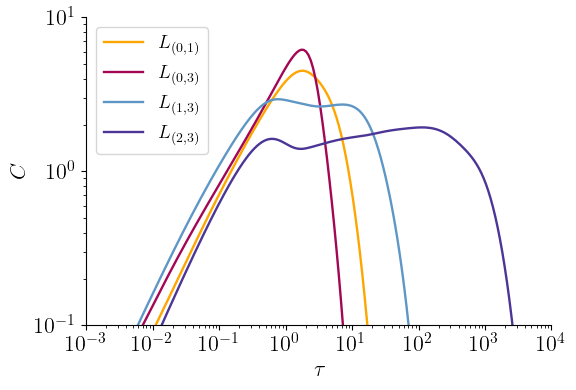

In [50]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(len(laplacians_types)):
    if i != 3:
        alph = 1
    else:
        alph = 1
    ax.loglog(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7,alpha = alph)
ax.set_ylim([10**-1,10])
ax.set_xlim([10**-3,10**4])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#ax.hlines(y = 0.8,xmin=0.2,xmax = 700,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/{name}_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/Pseudofractal/pseudofractal_21.pdf')


## Measure scale-invariance

In [5]:
from itertools import groupby

def measure_SI(tau_space,sp_heat, l = 0.1,ymin = -5,ymax = 1, ny = 70):
    max_plateau = 0
    sp_heat =  np.log(sp_heat)
    for y in np.linspace(ymin,ymax,ny):
        mask = np.abs(sp_heat-y)<l
        list_s = [[a,len(list(k))] for a,k in groupby(mask)]
        for j in range(len(list_s)):
            if list_s[j][0]:
                if list_s[j][1] > max_plateau:
                    max_plateau = list_s[j][1]

    return max_plateau*np.log(tau_space[1]/tau_space[0])

/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_14425/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_14425/509489392.py:5: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


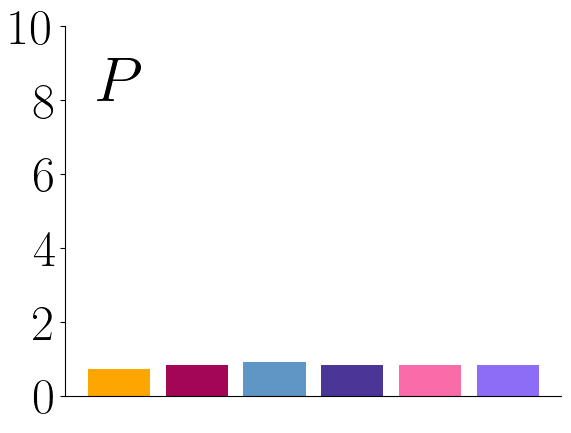

In [42]:
measure = np.zeros(len(laplacians_types))
for i in range(len(laplacians_types)):
    #measure[i] = measure_SI(tau_space,np.mean(np.array(sp_heats[i]),0),l=0.2,ymin = -4,ymax = 2,ny = 100)
    measure[i] = measure_SI(tau_space,np.array(sp_heats[i]),l=0.2,ymin = -4,ymax = 2,ny = 100)

#measure = [0,measure[0],0]
#laplacians_types = ["",laplacians_types[0],""]

plt.bar([i for i in range(len(laplacians_types))],(measure),color = colors_curves[1:])
#plt.xticks([i for i in range(len(laplacians_types))],names,fontsize = 24);
plt.xticks([]);
plt.yticks(fontsize = 36)
plt.locator_params(axis='y', nbins=6)

plt.ylim([0,10]) # NGF 0,12
#plt.ylabel("$P$",fontsize = 16)
plt.text(-0.3, 8, "$P$", fontsize = 46) # NGF -0.3 10

sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Measures/NGF/d{d}s{s}_{N}nodes.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Measures/Pseudofractal/{steps}steps.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Measures/RealData/{name}_measure.pdf')


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_4326/1616938826.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_4326/1616938826.py:5: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


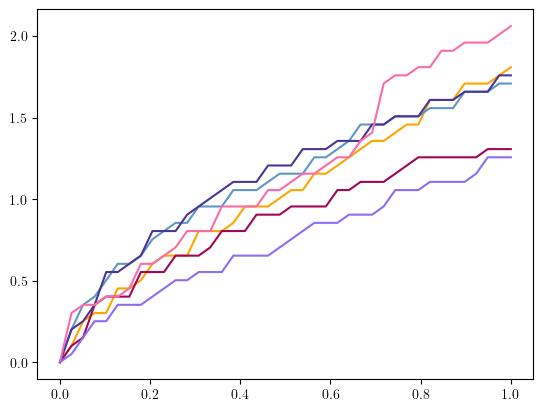

In [313]:
thrspace = np.linspace(0,1,40)
measure = np.zeros(40)
for i in range(len(laplacians_types)):
    for thr in range(40):
        measure[thr] =  measure_SI(tau_space,sp_heats[i],l=thrspace[thr])

    plt.plot(thrspace, (measure), color = colors_curves[i+1])

In [315]:
measure_matrix = np.zeros((d+1,d+1))
for k in range(len(laplacians_types)):
    measure_matrix[int(laplacians_types[k][0]),int(laplacians_types[k][1])] = measure[k]


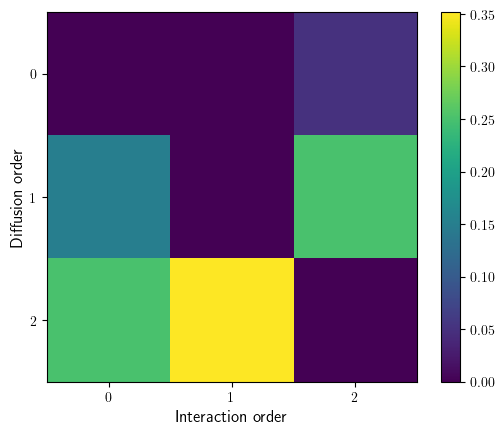

In [316]:
plt.imshow(measure_matrix,cmap="viridis")
plt.xlabel("Interaction order")
plt.ylabel("Diffusion order")
plt.xticks(range(d+1))
plt.yticks(range(d+1))
plt.colorbar()

## Comparison

In [62]:
# Load real data

names = ["asoiaf", "ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email", "celegans", "ecoli", "mmusculus", "drosophila"]

matrices = []
for name in names:
    j = 0
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'rb') as handle:
        sp_heats = pickle.load(handle)

    d = int((-1+np.sqrt(1+4*len(sp_heats)))/2)
    laplacians_types = [f"{k}{m}" for k in range(d+1) for m in range(d+1) if m!=k]
    tau_space = np.logspace(-5,5,200)[:200-1]

    measure = np.zeros(len(laplacians_types))
    for i in range(len(laplacians_types)):
        measure[i] = measure_SI(tau_space,sp_heats[i],l=0.2,ymin = -4,ymax = 2,ny = 100)

    measure_matrix = np.zeros((d+1,d+1))
    for k in range(len(laplacians_types)):
        measure_matrix[int(laplacians_types[k][0]),int(laplacians_types[k][1])] = measure[k]
    matrices.append(measure_matrix)

/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_7381/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_7381/509489392.py:5: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


In [75]:
cmap = LinearSegmentedColormap.from_list("sas", colors_sequential[0:8], N=100)


In [98]:
names = ["asoiaf", "ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email", "celegans", "ecoli", "mmusculus", "drosophila"]
true_names = ["\emph{A Song of Ice and Fire}", "\emph{Facebook friendship}","\emph{E-road network}", "\emph{Co-authorship}", "\emph{Email}", "\emph{C. Elegans}", "\emph{E. Coli}", "\emph{M. Musculus}", "\emph{D. Melanogaster}"]


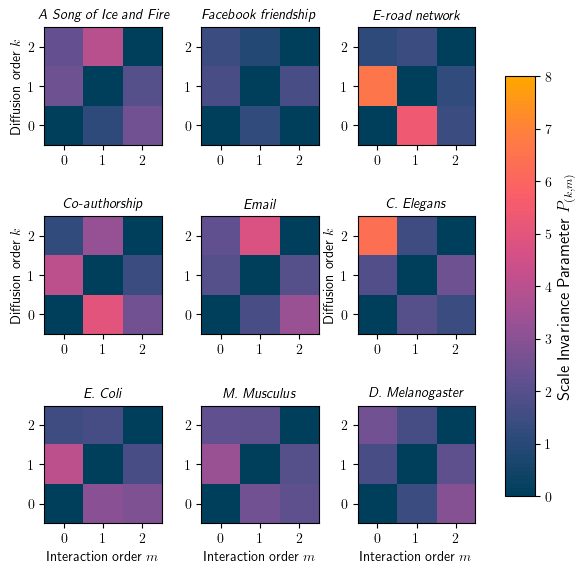

In [99]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize = (6,6))
n = 0
for ax in axes.flat:
    im = ax.imshow(matrices[n], vmin=0, vmax=8,cmap=cmap,origin='lower')
    ax.set_xticks([0,1,2])
    ax.set_title(true_names[n],fontsize = 10)
    if n in [6,7,8]:
        ax.set_xlabel("Interaction order $m$", fontsize = 10)
    if n in [0,3,5]:
        ax.set_ylabel("Diffusion order $k$",fontsize = 10)
    #ax.plot(np.linspace(-0.5,2.5,4),1-np.linspace(-0.5,2.5,4),color = [0.5,0.5,0.5],linestyle = '--')
    ax.set_xlim([-0.5,2.5])
    ax.set_ylim([-0.5,2.5])
    n+= 1


fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax,label = "Scale Invariance Parameter $P_{(k,m)}$")
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/datasets_scale_invariance.pdf')


## Renormalize

In [448]:
lmax = 2
diff_order =0
int_order = 1
tau = 0.1
PLOT = False # Plotting might be very slow
VERBOSE = True

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, PLOT = PLOT, VERBOSE = VERBOSE, SAVENAME = None)


796
313


In [449]:
layout = [0,0]
for i in range(lmax):
    G = nx.from_edgelist(sequence[i]["edges"])
    layout[i] = nx.kamada_kawai_layout(G)
    

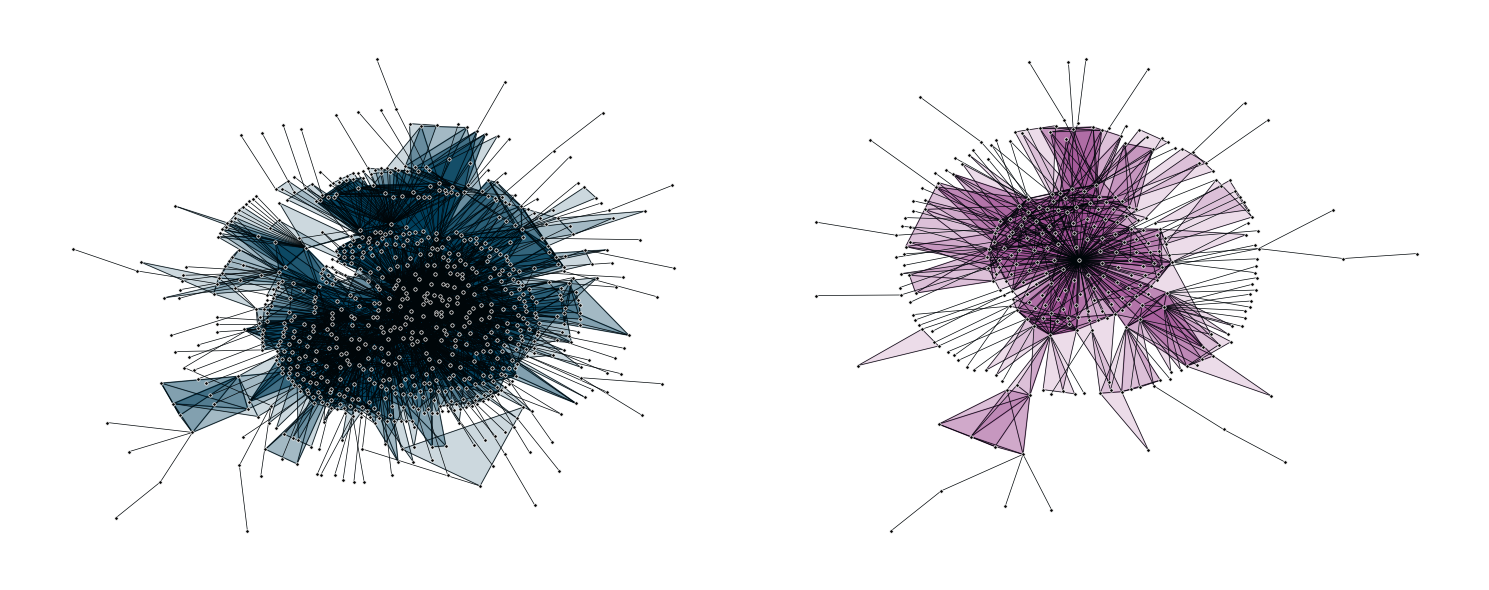

In [450]:
f, axs = plt.subplots(1,2,figsize = (15,6))
for i in range(lmax):
    plotting.plot_complex(sequence[i],ax = axs[i], face_color= [colors[i]],pos = layout[i], iterations=300, edge_color= [0.1*colors[l][i] for i in range(3)],node_size=6,edge_width=0.5,face_alpha = 0.2)
    axs[i].collections[0].set_linewidth(0.5) 
    axs[i].collections[0].set_edgecolor("#FFFFFF") 
plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/RealData/renormalize_asoiaf_L01_0p1.pdf")
plt.tight_layout()

In [308]:
pos = []
for l in range(lmax):
    #pos.append(nx.kamada_kawai_layout(nx.from_edgelist(sequence[l]["edges"])))
    #pos.append(nx.spectral_layout(nx.from_edgelist(sequence[l]["edges"])))
    pos.append(nx.spring_layout(nx.from_edgelist(sequence[l]["edges"])))


In [281]:
colors = [[0/255,63/255,92/255],[160/255,81/255,149/255],[255/255,124/255,67/255],[255/255,166/255,0/255]]

In [334]:
plotting.plot_complex(sequence[-1],ax = ax, face_color= [colors[l]], iterations=100, edge_color= [0.1*colors[l][i] for i in range(3)],node_size=20,edge_width=0.7,face_alpha = alph)


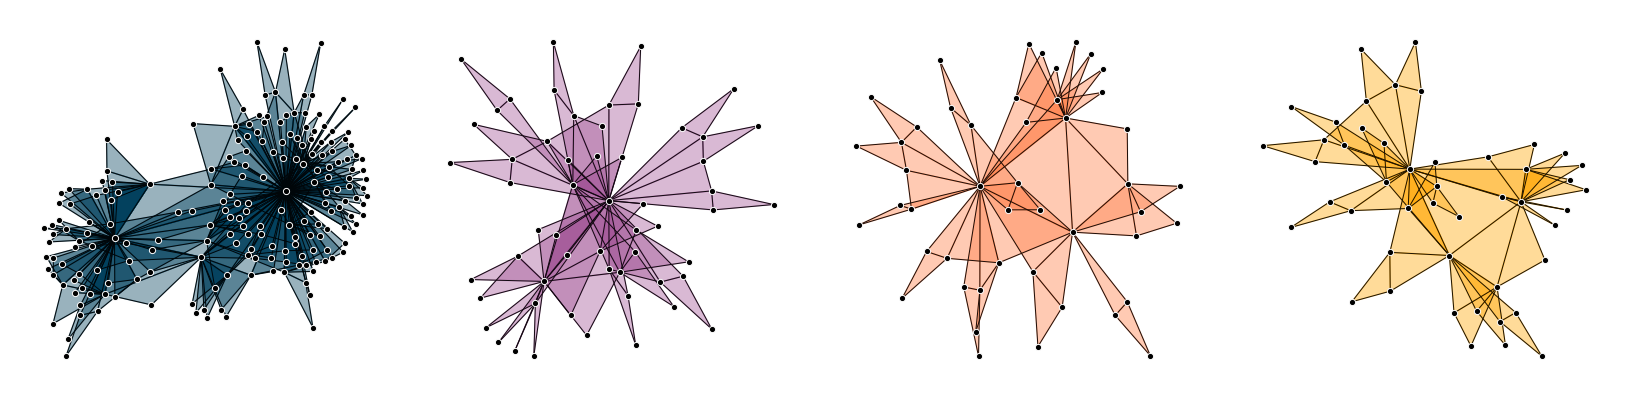

In [309]:
# Plot them
f,axs = plt.subplots(1,lmax,figsize = (4.1*lmax,4.1))
for l in range(lmax):
    alph = 0.4
    sc2 = sequence[l] 
    ax = axs[l]
    plotting.plot_complex(sc2,ax = ax, face_color= [colors[l]],pos = pos[l], iterations=3000, edge_color= [0.1*colors[l][i] for i in range(3)],node_size=20,edge_width=0.7,face_alpha = alph)

    ax.collections[0].set_linewidth(0.7) 
    ax.collections[0].set_edgecolor("#FFFFFF") 

plt.tight_layout()
plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/NGF/renormalize_NGF_L01_tau0p22.pdf")

In [20]:
import scipy

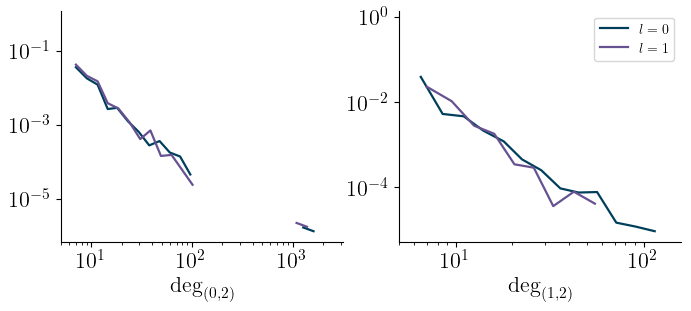

In [408]:
d = 2
f,axs = plt.subplots(1,d,figsize = (4*(d),3))
for l in range(lmax):
    sc2 = sequence[l]
    for i in range(d):
        A = scomplex.adjacency_of_order(sc2,i,d)
        deg = np.sum(A,0)#/(scipy.special.comb(d+1,i+1)-1)
        pwl.plot_pdf(deg[deg>0],ax = axs[i],linewidth = 1.6,color = colors_sequential[2*l])

plt.legend([f"$l = {l}$" for l in range(lmax)])
for i in range(d):
    axs[i].set_xlabel(r"$\mathrm{deg}_"+f"{{({i},{d})}}$",fontsize = 16)
    axs[i].xaxis.set_tick_params(labelsize=16)
    axs[i].yaxis.set_tick_params(labelsize=16)
    if i == 0:
        axs[i].set_xlim([5,10**3.5])
    else:
        axs[i].set_xlim([5,10**2.2])


sns.despine()
#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/NGF/renormalize_degrees_d2s1_L{diff_order}{int_order}_nodes1300_tau0p1.pdf")


In [452]:
taumin = -2
taumax = 5
ntau = 100
sp_heats_ren = []
for i in range(lmax):
    print(i)
    scc = sequence[i]
    Lnew = scomplex.diffusion_laplacian(scc, 2,1)

    Dnew, Unew = np.linalg.eigh(Lnew)
    specific_heat,tau_space, __ = renormalize.compute_heat(Dnew,taumin,taumax,ntau)
    sp_heats_ren.append(specific_heat)
    #sp_heats_ren[i] = specific_heat


0


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1


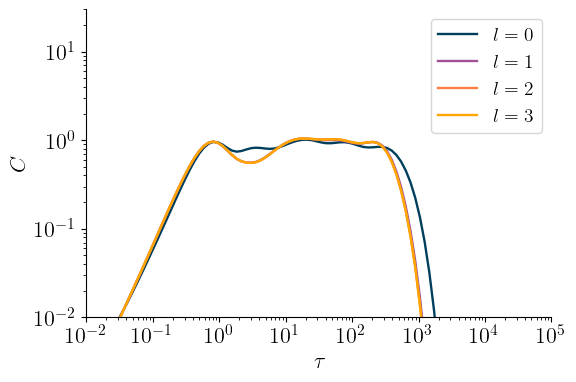

In [385]:
Ns = [sequence[l]["n0"] for l in range(lmax)]
names = [f"$l = {l}$" for l in range(lmax)]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(lmax):
    ax.loglog(tau_space,sp_heats_ren[i],color = colors[i],linewidth = 1.7)
ax.set_ylim([10**-2,30])
ax.set_xlim([10**-2,10**5])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.hlines(y = 1,xmin=5,xmax = 800,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()

#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/RealData/renormalize_plateau_CElegans_L{diff_order}{int_order}_tau0p038.pdf")


## Renormalize compute curves average

In [410]:
d = 3
N = 2000
nrep = 10
lmax = 2
diff_order =  0
int_order = 1
tau = 0.1
taumin = -2
taumax = 5
ntau = 100
PLOT = False # Plotting might be very slow
VERBOSE = True

sp_heats_ren = []
degs = [[np.array([]) for _ in range(lmax)] for _ in range(d)]
for i in range(nrep):
    print(f"Repetition: {i}")
    sc = scomplex.NGF(d,N,1,0.1,1)
    sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, PLOT = PLOT, VERBOSE = VERBOSE, SAVENAME = None)
    for l in range(lmax):
        scc = sequence[l]
        Lnew = scomplex.diffusion_laplacian(scc, 1, 2)
        Dnew, Unew = np.linalg.eigh(Lnew)
        specific_heat,tau_space, __ = renormalize.compute_heat(Dnew,taumin,taumax,ntau)
        if i == 0:
            sp_heats_ren.append(specific_heat/nrep)
        else:
            sp_heats_ren[l] += specific_heat/nrep

        for j in range(d):
            A = scomplex.adjacency_of_order(scc,j,d)
            deg = np.sum(A,0)/(scipy.special.comb(d+1,j+1)-1)
            degs[j][l] = np.append(degs[j][l],deg)


Repetition: 0
2000
788


KeyboardInterrupt: 

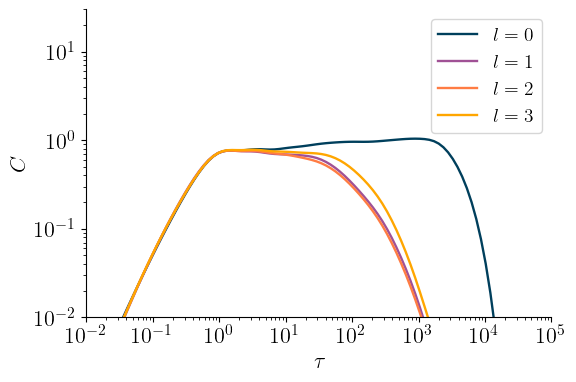

In [350]:
#Ns = [sequence[l]["n0"] for l in range(lmax)]
names = [f"$l = {l}$" for l in range(lmax)]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(lmax):
    ax.loglog(tau_space,sp_heats_ren[i],color = colors[i],linewidth = 1.7)
ax.set_ylim([10**-2,30])
ax.set_xlim([10**-2,10**taumax])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.hlines(y = 1,xmin=5,xmax = 800,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()

#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/NGF/renormalize_plateau_d2s1_L{diff_order}{int_order}_nodes1300_tau0p8.pdf")


## Plot curves repeat

In [117]:
nrep = 50
N = 200
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

for n in range(nrep):
    print(n)
    G = nx.random_tree(n = N)
    G = subdivide(G)
    G = subdivide(G)
    sc = scomplex.convert_graph_to_sc(G,dim = 1)
    L = scomplex.diffusion_laplacian(sc,0,1)
    D,U = np.linalg.eigh(L)
    D = np.abs(D)
    specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
    spectral_dimension,tau_space = compute_spectral_d(D,taumin,taumax,ntau)
    if n == 0:
        #sp_heat = specific_heat/nrep
        #sp_dim = spectral_dimension/nrep
        sp_heat = sp_heat*50/(50+nrep) +  specific_heat/nrep
        sp_dim = sp_dim*50/(50+nrep) +  spectral_dimension/nrep
    else:
        sp_heat += specific_heat/nrep
        sp_dim += spectral_dimension/nrep

0


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_13355/3934631811.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0,12])


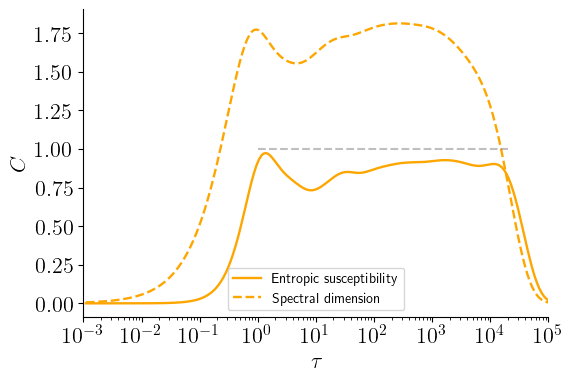

In [119]:
f,ax = plt.subplots(1,1,figsize = (6,4))

ax.semilogx(tau_space,sp_heat,color = colors_curves[1],linewidth = 1.7,alpha = 1)
ax.semilogx(tau_space,sp_dim,linestyle = '--', color = colors_curves[1],linewidth = 1.7,alpha = 1)

#ax.set_ylim([10**-2,10])
ax.set_xlim([0,12])
ax.set_xlim([10**-3,10**5])
#ax.set_xlim([0, 0.8])

ax.legend(["Entropic susceptibility", "Spectral dimension"],fontsize = 10)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#ax.hlines(y =0.58,xmin=1,xmax = 48,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
ax.hlines(y =1,xmin=1,xmax = 20000,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)

sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/chain_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/Pseudofractal/pseudofractal_21.pdf')


## Measure how the SIP changes with tau^*

In [43]:
lmax = 2
diff_order = 2
int_order = 0
ntau_ren = 10
tau_range = np.linspace(0,0.3,ntau_ren)

taumin = -5
taumax = 2
ntau = 100
measure = np.zeros(ntau_ren)
for t in range(ntau_ren):
    print(t)
    tau = tau_range[t]
    sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, PLOT = False, VERBOSE = False, SAVENAME = None)
    scc = sequence[-1]
    Lnew = scomplex.diffusion_laplacian(scc, 2,0)
    Dnew, Unew = np.linalg.eigh(Lnew)
    specific_heat,tau_space, __ = renormalize.compute_heat(Dnew,taumin,taumax,ntau)
    measure[t] = measure_SI(tau_space,specific_heat,l=0.2)


0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))


1
2
3
4


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_673/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_673/509489392.py:5: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


5
6
7
8
9


In [44]:
measure20 = measure

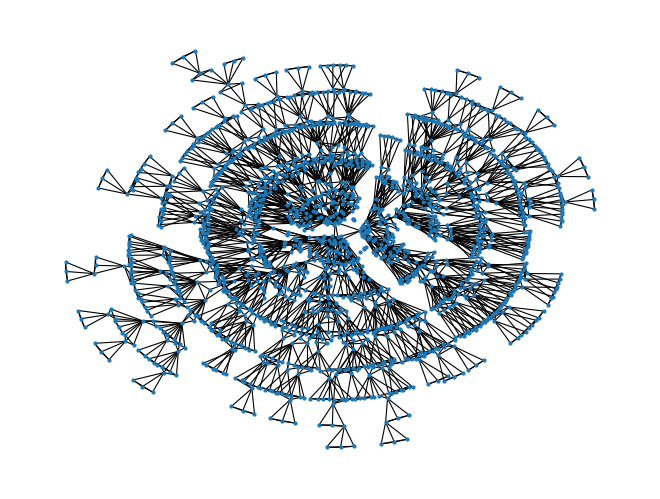

In [6]:
k = 2
l = 3
A = scomplex.adjacency_of_order(scc,k,l,False)
G = nx.from_numpy_matrix(A)
weights = [0.8*G[u][v]['weight'] for u,v in G.edges]

layout = nx.kamada_kawai_layout(G)
nx.draw(G,pos = layout,node_size = 4,width = weights)
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Graphs/Tree_21_G{k}{l}.pdf')

In [44]:
Dnew = np.abs(Dnew)
tau_space = np.logspace(-2, 4, num=200)
S = np.zeros(200)
for t in range(200):
    tau = tau_space[t]
    mu = np.zeros(scc["n2"])
    for i in range(scc["n2"]):
        mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))

    mu = mu[mu > 0]
    S[t] = -np.sum(mu * np.log(mu))

IndexError: index 1492 is out of bounds for axis 0 with size 1492

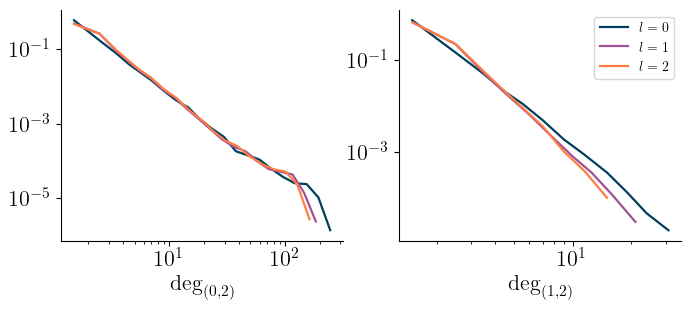

In [33]:
f,axs = plt.subplots(1,d,figsize = (4*(d),3))
for l in range(lmax):
    for i in range(d):
        pwl.plot_pdf(degs[i][l][degs[i][l]>0],ax = axs[i],linewidth = 1.6,color = colors_sequential[3*l])

plt.legend([f"$l = {l}$" for l in range(lmax)])
for i in range(d):
    axs[i].set_xlabel(r"$\mathrm{deg}_"+f"{{({i},{d})}}$",fontsize = 16)
    axs[i].xaxis.set_tick_params(labelsize=16)
    axs[i].yaxis.set_tick_params(labelsize=16)


sns.despine()
plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/NGF/renormalize_degrees_d2s1_L{diff_order}{int_order}_nodes1300_tau0p8.pdf")


## Plot curves increase N

In [461]:
steps_list = [2,3,4,5,6,7]
laplacians_types = ["01","02","10","12","20","21"]

#steps_list = [300,500,700,900,1100,1500]
taumin = -2
taumax = 4
ntau = 200

diff_order = 0
int_order = 1

measure = np.zeros((len(steps_list),len(laplacians_types)))
Ns = []
for s in range(len(steps_list)):
    print(s)
    sc = PF21(steps_list[s])
    for l in range(len(laplacians_types)):    
        lt = laplacians_types[l]
        L = scomplex.diffusion_laplacian(sc, k=int(lt[0]), l=int(lt[1]),sparse = sparse)
        D,U = np.linalg.eigh(L)
        D = np.abs(D)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        measure[s,l] = measure_SI(tau_space,specific_heat,l=0.2,ymin = -4,ymax = 2,ny = 100)
       

0


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_1042/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5


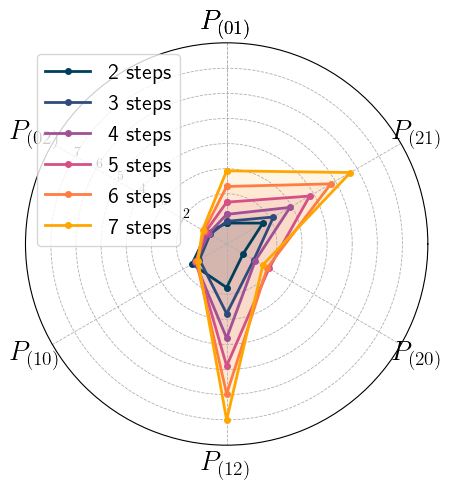

In [515]:
f = plt.figure(figsize = (5,5))
ax = plt.subplot(1,1,1,polar=True)

for s in range(len(steps_list)):
    stats = measure[s,:]
    angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(laplacians_types), endpoint=False),2*np.pi)
    
    stats = np.concatenate((stats,[stats[0]]))

    angles =np.concatenate((angles,[angles[0]]))
    ax.plot(angles, stats, 'o-', linewidth=2,color = colors_sequential[int(np.floor(3/2*s))],markersize = 4,label = f"{steps_list[s]} steps")
    ax.fill(angles, stats, alpha=0.1,color = colors_sequential[int(np.floor(3/2*s))],label = "")

    ax.set_xticks(angles,[r"$P_{(%s)}$"%l for l in laplacians_types+[laplacians_types[0]]],fontsize = 20)
    ax.set_rticks([2,3,4,5,6,7],fontsize = 14)
    ax.set_rlabel_position(150.5)  # Move radial labels away from plotted line

    ax.set_ylim(0,max(np.max(measure)+1,4))
    #ax.grid(False)
    ax.grid(linewidth=0.6,linestyle = '--')


plt.legend(fontsize = 16)
plt.tight_layout()
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Measures/Pseudofractal/fifa_PF.pdf')


## Plot curves increase d

In [150]:
drange = [1,2,3,4]
N = 800
s = 1
m = 1
nrep = 10
beta = 0.1
taumin = -3 # Heat curve starts from 10**taumin
taumax = 4 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

sp_heats = []
sp_dims = []
for d in drange:
    print(d)
    for n in range(nrep):
        # Network Geometry with Flavor
        sc = scomplex.NGF(d,N,s,beta,m)
        L = scomplex.diffusion_laplacian(sc, k=d-1, l=d,sparse = False)
        D,U = np.linalg.eig(L)
        D = np.sort((np.real(D)))
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        spectral_dimension,tau_space = compute_spectral_d(D,taumin,taumax,ntau)
        if n == 0:
            sp_heats.append(specific_heat/nrep)
            sp_dims.append(spectral_dimension/nrep)
        else:
            sp_heats[d-1] += specific_heat/nrep
            sp_dims[d-1] += spectral_dimension/nrep

1
2
3
4


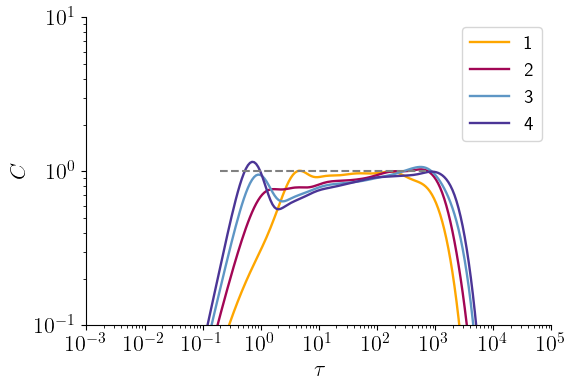

In [151]:
names = [f"{d}" for d in drange]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(len(drange)):
    ax.loglog(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7)
    #ax.semilogx(tau_space,sp_dims[i],linestyle = '--', color = colors_curves[i+1],linewidth = 1.7,alpha = alph)

ax.set_ylim([10**-1,10])
ax.set_xlim([10**-3,10**5])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax.hlines(y =1,xmin=0.2,xmax = 700,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/{name}_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/Pseudofractal/pseudofractal_21.pdf')


## Compute measures normalized

In [47]:
def load_dataset(name,dim = 2):
    f = open(f"../Datasets/out.{name}","r")
    i = 0
    edges = []
    for line in f:
        if i != 0:
            words = line.split()
            edges.append((words[0],words[1]))
        else:
            i += 1
    f.close()
    G = nx.from_edgelist(edges)
    G = nx.convert_node_labels_to_integers(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    sc = scomplex.convert_graph_to_sc(G,dim = dim)
    return sc

In [49]:
sp_heats

[[array([ 4.34540073e-06,  5.22819587e-06,  6.29022379e-06,  7.56783800e-06,
          9.10475379e-06,  1.09535357e-05,  1.31773839e-05,  1.58522793e-05,
          1.90695605e-05,  2.29390158e-05,  2.75925959e-05,  3.31888676e-05,
          3.99183570e-05,  4.80099568e-05,  5.77386072e-05,  6.94345003e-05,
          8.34941044e-05,  1.00393364e-04,  1.20703496e-04,  1.45109876e-04,
          1.74434620e-04,  2.09663548e-04,  2.51978365e-04,  3.02795036e-04,
          3.63809503e-04,  4.37052082e-04,  5.24952129e-04,  6.30414797e-04,
          7.56912019e-04,  9.08590177e-04,  1.09039727e-03,  1.30823284e-03,
          1.56912424e-03,  1.88143340e-03,  2.25509868e-03,  2.70191660e-03,
          3.23586897e-03,  3.87350101e-03,  4.63435589e-03,  5.54147152e-03,
          6.62194410e-03,  7.90756224e-03,  9.43551332e-03,  1.12491605e-02,
          1.33988848e-02,  1.59429793e-02,  1.89485757e-02,  2.24925701e-02,
          2.66625011e-02,  3.15573154e-02,  3.72879314e-02,  4.39774870e-02,

In [50]:
datasets = ["asoiaf", "ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email"]#, "celegans", "ecoli", "mmusculus", "drosophila"]
laplacians_types = ["01","02","10","12","20","21"]

nrep = 10

# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

for name in datasets:
    print(name)
    sc = load_dataset(name)
    sp_heats = []
    for n in range(nrep):
        print(n)
        for l in range(len(laplacians_types)):    
            lap_type = laplacians_types[l]
            # Configuration model
            A = scomplex.diffusion_laplacian(sc, k=int(lap_type[0]), l=int(lap_type[1]),sparse = sparse)
            Gcm = nx.Graph(A)
            Gcm = nx.configuration_model([val for (node, val) in G.degree()])
            L = nx.laplacian_matrix(Gcm).todense()
            D,U = np.linalg.eigh(L)
            D = np.abs(D)
            specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
            if n == 0:
                sp_heats.append([specific_heat])
            else:
                sp_heats[l].append(specific_heat)

    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats_cm/{name}_sp_heats.pickle', 'wb') as handle:
        pickle.dump(sp_heats, handle, protocol=pickle.HIGHEST_PROTOCOL)


asoiaf
0


<class 'networkx.utils.decorators.argmap'> compilation 28:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5
6
7
8
9
ego-facebook
0
1
2
3
4
5
6
7
8
9
subelj_euroroad_euroroad
0
1
2
3
4
5
6
7
8
9
dimacs10-netscience
0
1
2
3
4
5
6
7
8
9
arenas-email
0
1
2
3
4
5
6
7
8
9


In [167]:
# Load real data

# pickle: asoiaf, ego-facebook,subelj_euroroad_euroroad, dimacs10-netscience, arenas-email, celegans, ecoli, mmusculus, drosophila

name = "ego-facebook"
with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats_cm/{name}_sp_heats.pickle', 'rb') as handle:
    sp_heats_cm = pickle.load(handle)
with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'rb') as handle:
    sp_heats = pickle.load(handle)  


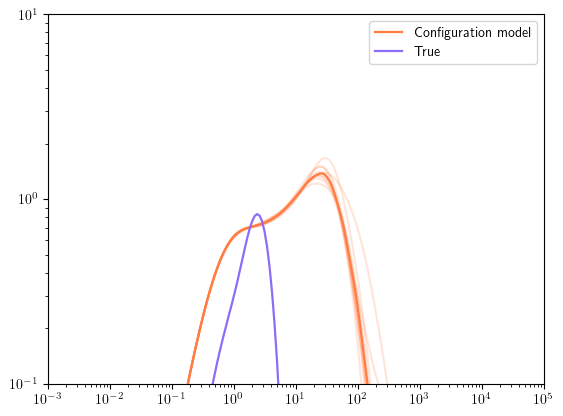

In [168]:
i = 5
for n in range(nrep):
    plt.loglog(tau_space,sp_heats_cm[i][n],color = colors_sequential[i+1],alpha = 0.2,label = "")

plt.loglog(tau_space,np.median(np.array(sp_heats_cm[i]),0),color = colors_sequential[i+1],alpha = 1,linewidth = 1.6,label = "Configuration model")

plt.loglog(tau_space,sp_heats[i],color = colors_curves[i+1],alpha = 1,linewidth = 1.6,label = "True")

plt.ylim([10**-1,10])
plt.xlim([10**-3,10**5])
plt.legend()
#plt.legend([""],fontsize = 12)

In [523]:
np.sp_heats_cm

[[array([ 4.34121172e-06,  5.22315964e-06,  6.28416961e-06,  7.56056084e-06,
          9.09600764e-06,  1.09430254e-05,  1.31647553e-05,  1.58371079e-05,
          1.90513375e-05,  2.29171316e-05,  2.75663205e-05,  3.31573275e-05,
          3.98805072e-05,  4.79645484e-05,  5.76841488e-05,  6.93692120e-05,
          8.34158649e-05,  1.00299648e-04,  1.20591299e-04,  1.44975632e-04,
          1.74274103e-04,  2.09471759e-04,  2.51749405e-04,  3.02521963e-04,
          3.63484173e-04,  4.36664981e-04,  5.24492190e-04,  6.29869221e-04,
          7.56266102e-04,  9.07827173e-04,  1.08949831e-03,  1.30717696e-03,
          1.56788856e-03,  1.87999362e-03,  2.25342989e-03,  2.69999475e-03,
          3.23367322e-03,  3.87101721e-03,  4.63158196e-03,  5.53842523e-03,
          6.61867438e-03,  7.90416537e-03,  9.43215577e-03,  1.12461110e-02,
          1.33965589e-02,  1.59420009e-02,  1.89498607e-02,  2.24974407e-02,
          2.66728383e-02,  3.15757627e-02,  3.73181625e-02,  4.40245539e-02,

/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_6645/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_6645/509489392.py:5: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


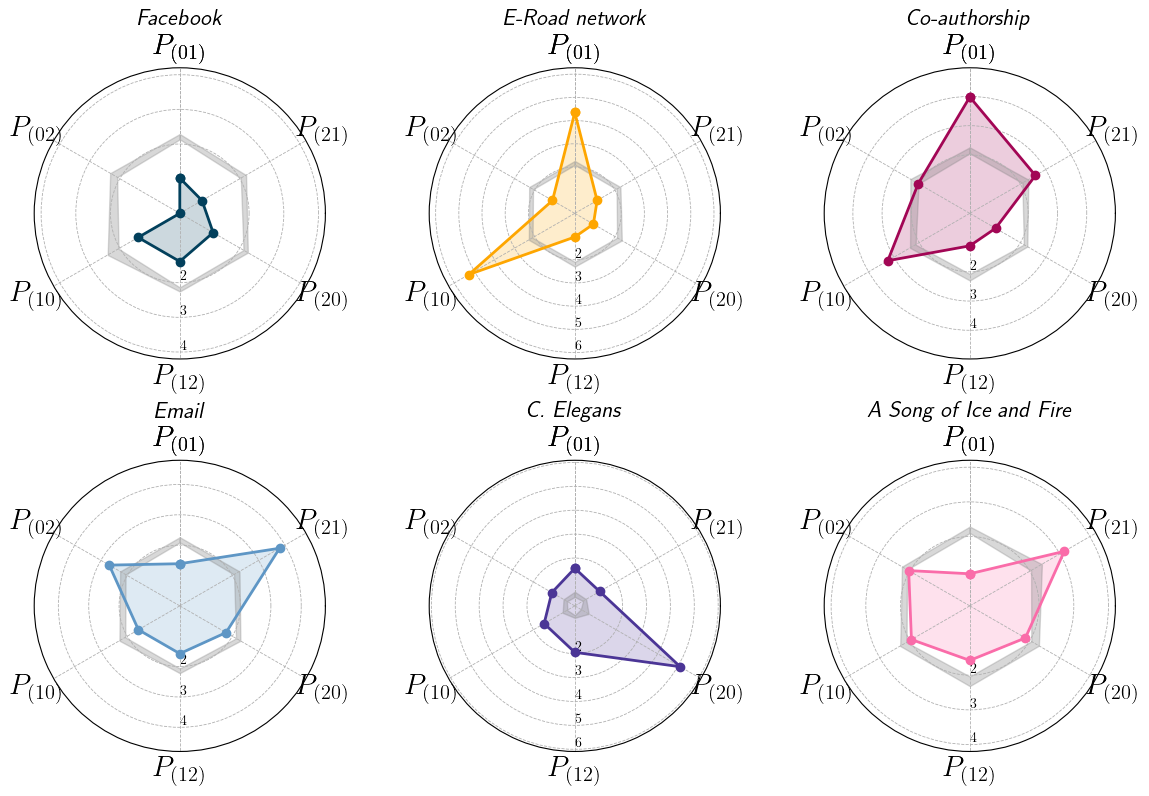

In [8]:
# Load real data

laplacians_types = ["01","02","10","12","20","21"]
nrep = 10
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

tau_space = np.logspace(taumin,taumax,ntau)


names = ["ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email","celegans","asoiaf"]#, celegans, ecoli, mmusculus, drosophila
true_names = [r"\emph{Facebook}",r"\emph{E-Road network}",r"\emph{Co-authorship}",r"\emph{Email}",r"\emph{C. Elegans}", r"\emph{A Song of Ice and Fire}"]
fig = plt.figure(figsize = (4*3,4*2))
idx = 0
for nn,name in enumerate(names):
    
    if name == "celegans":
        sp_heats_cm = [[np.random.rand(len(tau_space)) for i in range(10)] for j in range(6)]
    else:
        with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats_cm/{name}_sp_heats.pickle', 'rb') as handle:
            sp_heats_cm = pickle.load(handle)

    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'rb') as handle:
        sp_heats = pickle.load(handle)  
    
    measure = np.zeros(len(laplacians_types))
    measure_cm = np.zeros((len(laplacians_types),nrep))

    for i in range(len(laplacians_types)):
        measure[i] = measure_SI(tau_space,sp_heats[i],l=0.2,ymin = -4,ymax = 2,ny = 100)
        for n in range(nrep):
            measure_cm[i,n] = measure_SI(tau_space,sp_heats_cm[i][n],l=0.2,ymin = -4,ymax = 2,ny = 100)

    #plt.figure(figsize=(5,5))
    ax = plt.subplot(2,3,idx+1, polar=True)
    #ax = axs[i]
    stats = measure
    stats_cm = np.mean(measure_cm,1)
    stats_cm_std = np.std(measure_cm,1)

    angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(laplacians_types), endpoint=False),2*np.pi)
    stats = np.concatenate((stats,[stats[0]]))
    stats_cm = np.concatenate((stats_cm,[stats_cm[0]]))
    stats_cm_std = np.concatenate((stats_cm_std,[stats_cm_std[0]]))

    angles = np.concatenate((angles,[angles[0]]))
    ax.plot(angles, stats, 'o-', linewidth=2,color = colors_curves[idx])
    ax.fill(angles, stats, alpha=0.2,color = colors_curves[idx])
    ax.fill_between(angles, stats_cm + stats_cm_std,stats_cm - stats_cm_std, alpha=0.3, color = "gray")
    #ax.fill(angles, stats_cm - stats_cm_std, alpha=0.2, color = "gray")

    ax.set_xticks(angles,[f"$P_{{({l})}}$" for l in laplacians_types+[laplacians_types[0]]],fontsize = 21)
    ax.set_rticks([ll for ll in range(2,int(max(np.max(measure)+2,5)))], fontsize =16 )
    ax.set_rlabel_position(-90)  # Move radial labels away from plotted line

    ax.set_title(true_names[nn],fontsize = 16)
    #ax.set_title(r,fontsize=30)
    ax.set_ylim(0,max(np.max(measure)+1,4.2))
    ax.grid(True)
    ax.grid(linewidth=0.6,linestyle = '--')

    idx+=1

plt.tight_layout()
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Measures/RealData/fifa.pdf')


In [ ]:

# Load real data

names = ["asoiaf", "ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email"]#, celegans, ecoli, mmusculus, drosophila
fig = plt.figure(figsize = (4*len(names),4))
idx = 0
for name in names:
    
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats_cm/{name}_sp_heats.pickle', 'rb') as handle:
        sp_heats_cm = pickle.load(handle)
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'rb') as handle:
        sp_heats = pickle.load(handle)  
    measure = np.zeros(len(laplacians_types))
    measure_cm = np.zeros((len(laplacians_types),nrep))

    for i in range(len(laplacians_types)):
        measure[i] = measure_SI(tau_space,sp_heats[i],l=0.2,ymin = -4,ymax = 2,ny = 100)
        for n in range(nrep):
            measure_cm[i,n] = measure_SI(tau_space,sp_heats_cm[i][n],l=0.2,ymin = -4,ymax = 2,ny = 100)

    #plt.figure(figsize=(5,5))
    ax = plt.subplot(1,len(names),idx+1, polar=True)
    #ax = axs[i]
    stats = measure
    stats_cm = np.mean(measure_cm,1)
    stats_cm_std = np.std(measure_cm,1)

    angles = np.linspace(0, 2*np.pi, len(laplacians_types), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    stats_cm = np.concatenate((stats_cm,[stats_cm[0]]))
    stats_cm_std = np.concatenate((stats_cm_std,[stats_cm_std[0]]))

    angles = np.concatenate((angles,[angles[0]]))
    ax.plot(angles, stats, 'o-', linewidth=2,color = colors_curves[idx])
    ax.fill(angles, stats, alpha=0.4,color = colors_curves[idx])
    ax.fill_between(angles, stats_cm + stats_cm_std,stats_cm - stats_cm_std, alpha=0.2, color = "gray")
    #ax.fill(angles, stats_cm - stats_cm_std, alpha=0.2, color = "gray")

    ax.set_xticks(angles,[f"$L_{{{l}}}$" for l in laplacians_types+[laplacians_types[0]]],fontsize = 16)
    ax.set_yticks([1,2,3,4,5,6,7])

    ax.set_title(name,fontsize = 16)
    #ax.set_title(r,fontsize=30)
    ax.set_ylim(0,max(np.max(measure)+1,4))
    ax.grid(True)

    idx+=1

plt.tight_layout()
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Measures/RealData/fifa.pdf')


## Compute measure normalized PF

In [15]:
laplacians_types = ["01","02","10","12","20","21"]

nrep = 10

# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

sc = PF21(7)
sp_heats = []
for n in range(nrep):
    print(n)
    for l in range(len(laplacians_types)):    
        lap_type = laplacians_types[l]
        # Configuration model
        A = scomplex.diffusion_laplacian(sc, k=int(lap_type[0]), l=int(lap_type[1]),sparse = False)
        Gcm = nx.Graph(A)
        Gcm = nx.configuration_model([val for (node, val) in Gcm.degree()])
        L = nx.laplacian_matrix(Gcm).todense()
        D,U = np.linalg.eigh(L)
        D = np.abs(D)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        if n == 0:
            sp_heats.append([specific_heat])
        else:
            sp_heats[l].append(specific_heat)

with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/Pseudofractal/sp_heats_cm/PF_sp_heats.pickle', 'wb') as handle:
    pickle.dump(sp_heats, handle, protocol=pickle.HIGHEST_PROTOCOL)


0


<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5
6
7
8
9


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_1662/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)


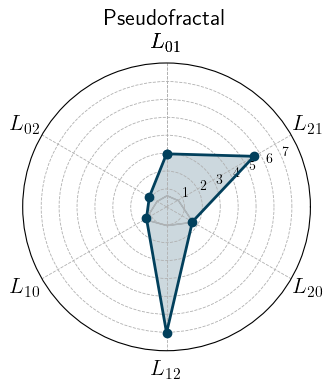

In [24]:

# Load real data
names = ["PF"]#, celegans, ecoli, mmusculus, drosophila
fig = plt.figure(figsize = (4*len(names),4))
idx = 0
laplacians_types = ["01","02","10","12","20","21"]
nrep = 10
tau_space = np.logspace(-3,5,200)
for name in names:
    
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/Pseudofractal/sp_heats/{name}_sp_heats.pickle', 'rb') as handle:
        sp_heats = pickle.load(handle)  
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/Pseudofractal/sp_heats_cm/{name}_sp_heats.pickle', 'rb') as handle:
        sp_heats_cm = pickle.load(handle)  

    measure = np.zeros(len(laplacians_types))
    measure_cm = np.zeros((len(laplacians_types),nrep))

    for i in range(len(laplacians_types)):
        measure[i] = measure_SI(tau_space,sp_heats[i],l=0.2,ymin = -4,ymax = 2,ny = 100)
        for n in range(nrep):
            measure_cm[i,n] = measure_SI(tau_space,sp_heats_cm[i][n],l=0.2,ymin = -4,ymax = 2,ny = 100)

    ax = plt.subplot(1,len(names),idx+1, polar=True)
    stats = measure
    stats_cm = np.mean(measure_cm,1)
    stats_cm_std = np.std(measure_cm,1)

    angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(laplacians_types), endpoint=False),2*np.pi)
    
    stats = np.concatenate((stats,[stats[0]]))
    stats_cm = np.concatenate((stats_cm,[stats_cm[0]]))
    stats_cm_std = np.concatenate((stats_cm_std,[stats_cm_std[0]]))

    angles =np.concatenate((angles,[angles[0]]))
    ax.plot(angles, stats, 'o-', linewidth=2,color = colors_curves[idx])
    ax.fill(angles, stats, alpha=0.2,color = colors_curves[idx])
    ax.fill_between(angles, stats_cm + stats_cm_std,stats_cm - stats_cm_std, alpha=0.4, color = "gray")
    #ax.plot(angles, stats_cm, alpha=1, color = "gray")

    ax.set_xticks(angles,[f"$L_{{{l}}}$" for l in laplacians_types+[laplacians_types[0]]],fontsize = 16)
    ax.set_yticks([1,2,3,4,5,6,7])

    ax.set_title("Pseudofractal",fontsize = 16)
    #ax.set_title(r,fontsize=30)
    ax.set_ylim(0,max(np.max(measure)+1,4))
    #ax.grid(False)
    ax.grid(linewidth=0.6,linestyle = '--')

    idx+=1

plt.tight_layout()
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Measures/Pseudofractal/fifa_PF.pdf')


## Compute measure normalized NGF

In [25]:
laplacians_types = ["01","02","10","12","20","21"]

nrep = 10

# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

sp_heats = []
for n in range(nrep):
    sc = scomplex.NGF(d = 2, N = 5000, s = 1,beta = 0.1)
    print(n)
    for l in range(len(laplacians_types)):    
        lap_type = laplacians_types[l]
        # Configuration model
        A = scomplex.diffusion_laplacian(sc, k=int(lap_type[0]), l=int(lap_type[1]),sparse = False)
        Gcm = nx.Graph(A)
        Gcm = nx.configuration_model([val for (node, val) in Gcm.degree()])
        L = nx.laplacian_matrix(Gcm).todense()
        D,U = np.linalg.eigh(L)
        D = np.abs(D)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        if n == 0:
            sp_heats.append([specific_heat])
        else:
            sp_heats[l].append(specific_heat)

with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/sp_heats_cm/ngf_sp_heats.pickle', 'wb') as handle:
    pickle.dump(sp_heats, handle, protocol=pickle.HIGHEST_PROTOCOL)


0


<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5
6
7
8
9


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_1662/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)


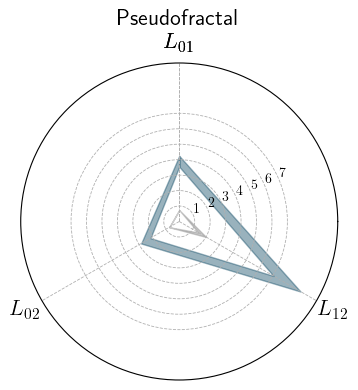

In [41]:

# Load real data
names = ["ngf"]#, celegans, ecoli, mmusculus, drosophila
fig = plt.figure(figsize = (4*len(names),4))
idx = 0
laplacians_types = ["01","02","12"]
nrep = 10
tau_space = np.logspace(-3,5,200)
for name in names:
    
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/Data/d2s1_10rep_5000nodes.pickle', 'rb') as handle:
        sp_heats = pickle.load(handle)  
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/sp_heats_cm/ngf_sp_heats.pickle', 'rb') as handle:
        sp_heats_cm = pickle.load(handle)  

    measure = np.zeros((len(laplacians_types),nrep))
    measure_cm = np.zeros((len(laplacians_types),nrep))

    for i in range(len(laplacians_types)):
        for n in range(nrep):
            measure[i,n] = measure_SI(tau_space,sp_heats[i][n],l=0.2,ymin = -4,ymax = 2,ny = 100)
            measure_cm[i,n] = measure_SI(tau_space,sp_heats_cm[i][n],l=0.2,ymin = -4,ymax = 2,ny = 100)

    ax = plt.subplot(1,len(names),idx+1, polar=True)
    stats = np.mean(measure,1)
    stats_std = np.std(measure,1)
    stats_cm = np.mean(measure_cm,1)
    stats_cm_std = np.std(measure_cm,1)

    angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(laplacians_types), endpoint=False),2*np.pi)
    
    stats = np.concatenate((stats,[stats[0]]))
    stats_std = np.concatenate((stats_std,[stats_std[0]]))
    stats_cm = np.concatenate((stats_cm,[stats_cm[0]]))
    stats_cm_std = np.concatenate((stats_cm_std,[stats_cm_std[0]]))

    angles =np.concatenate((angles,[angles[0]]))
    #ax.plot(angles, stats, 'o-', linewidth=2,color = colors_curves[idx])
    #ax.fill(angles, stats, alpha=0.2,color = colors_curves[idx])
    ax.fill_between(angles, stats + stats_std,stats - stats_std, alpha=0.4, color = colors_curves[idx])
    ax.fill_between(angles, stats_cm + stats_cm_std,stats_cm - stats_cm_std, alpha=0.4, color = "gray")
    #ax.plot(angles, stats_cm, alpha=1, color = "gray")

    ax.set_xticks(angles,[f"$L_{{{l}}}$" for l in laplacians_types+[laplacians_types[0]]],fontsize = 16)
    ax.set_yticks([1,2,3,4,5,6,7])

    ax.set_title("Pseudofractal",fontsize = 16)
    #ax.set_title(r,fontsize=30)
    ax.set_ylim(0,max(np.max(measure)+1,4))
    #ax.grid(False)
    ax.grid(linewidth=0.6,linestyle = '--')

    idx+=1

plt.tight_layout()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Measures/Pseudofractal/fifa_PF.pdf')
